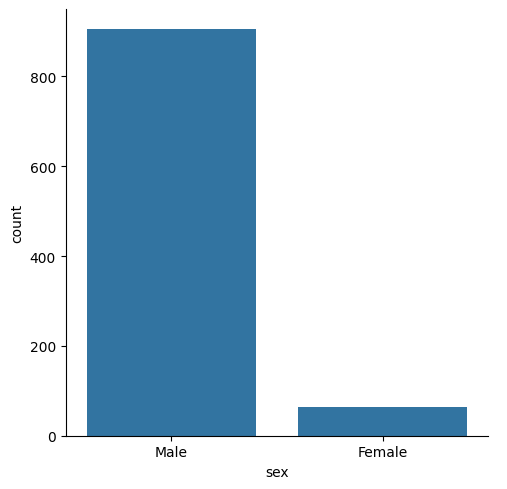

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

nobel = pd.read_csv('nobel.csv')

top_gender = sns.catplot(x="sex", data=nobel, kind="count")

In [2]:
top_gender = nobel['sex'].value_counts().index[0]
print(top_gender)

top_country = nobel['birth_country'].value_counts().index[0]
print(top_country)

Male
United States of America


In [3]:
nobel["us_winners"] = nobel["birth_country"] == "United States of America"
nobel["decade"] = (np.floor(nobel['year']/10) * 10).astype(int)
prop_us_winners = nobel.groupby("decade", as_index=False)["us_winners"].mean()
# setting as_index=False, you make sure the result is saved as a DataFrame rather than a series
print(prop_us_winners)

max_decade_usa = prop_us_winners[prop_us_winners["us_winners"] == prop_us_winners["us_winners"].max()]['decade'].values[0]
print(max_decade_usa)

    decade  us_winners
0     1900    0.017544
1     1910    0.075000
2     1920    0.074074
3     1930    0.250000
4     1940    0.302326
5     1950    0.291667
6     1960    0.265823
7     1970    0.317308
8     1980    0.319588
9     1990    0.403846
10    2000    0.422764
11    2010    0.314050
12    2020    0.360000
2000


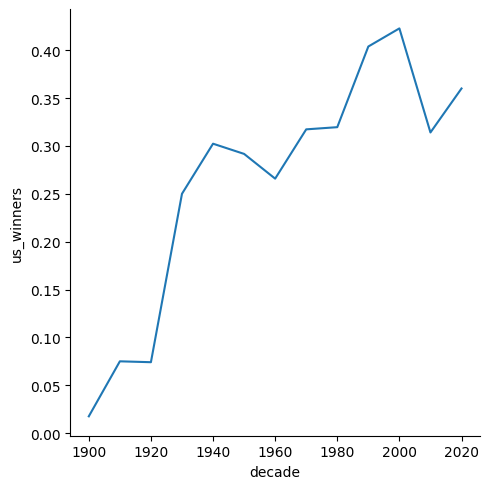

In [4]:
ax1 = sns.relplot(x='decade', y='us_winners', data=prop_us_winners, kind="line")
plt.show(ax1)

{np.int64(2020): 'Literature'}


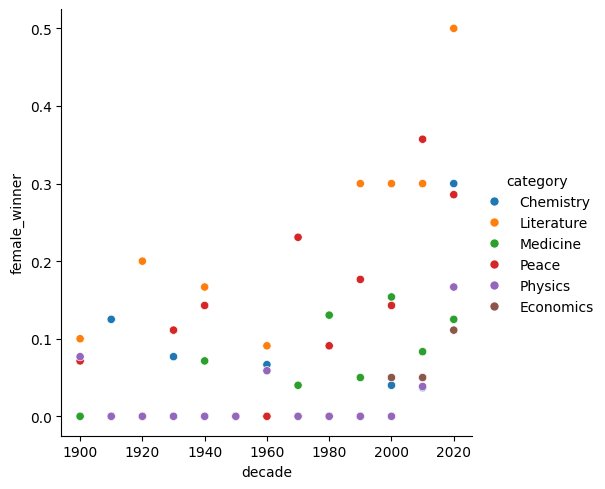

In [5]:
nobel['female_winner'] = nobel['sex'] == 'Female'
# Group by decade and prize category, then calculate the mean of female laureates
prop_female_winner = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winner[prop_female_winner['female_winner'] == prop_female_winner['female_winner'].max()][['decade', 'category']]
max_female_dict = {
    max_female_decade_category['decade'].values[0]:max_female_decade_category['category'].values[0]
}
print(max_female_dict)
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winner, kind="scatter")

In [ ]:
# Finding the first woman to win a Nobel Prize
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")

Marie Curie, née Sklodowska


In [9]:
# Selecting the laureates that have received 2 or more prizes
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Linus Carl Pauling']
